<a href="https://colab.research.google.com/github/RP-SDAAI/Capstone-Project/blob/main/ultralyticsplus_hardhat_230405.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Install repository to allows IPython to use Google Drive for file management

In [ ]:
#git clone git://github.com/jupyter/jupyter-drive.git
#pip install -e jupyter-drive

### To install the notebook extension and activate your configuration with Google Drive

In [ ]:
#python -m jupyterdrive

In [ ]:
pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 68.4 MB/s eta 0:00:00
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 2.70.0
    Uninstalling google-api-python-client-2.70.0:
      Successfully uninstalled google-api-python-client-2.70.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.11.2 requires google-auth-oauthlib<0.5,>=0.4.1, but you have google-auth-oauthlib 1.0.0 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
DataFolder = "/content/drive/MyDrive/SDAAI/Capstone-Project"

In [ ]:
pip install ultralyticsplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 1.0.0
    Uninstalling google-auth-oauthlib-1.0.0:
      Successfully uninstalled google-auth-oauthlib-1.0.0


In [ ]:
import torch
import cv2
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s') 

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-3-22 Python-3.9.16 torch-1.13.1+cu116 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
#image_path = DataFolder+"/Safety Hat/Images/hard_hat_workers0.png" # or file, Path, PIL, OpenCV, numpy, list
image_path = DataFolder+"/Safety-Hat/Images/Helmet-Example01.jpg"

# Inference
results = model(image_path) 

# Results
results.print()  # or .show(), .save(), .crop(), .pandas(), etc.

image 1/1: 760x1095 1 person
Speed: 26755.2ms pre-process, 509.4ms inference, 18.5ms NMS per image at shape (1, 3, 448, 640)


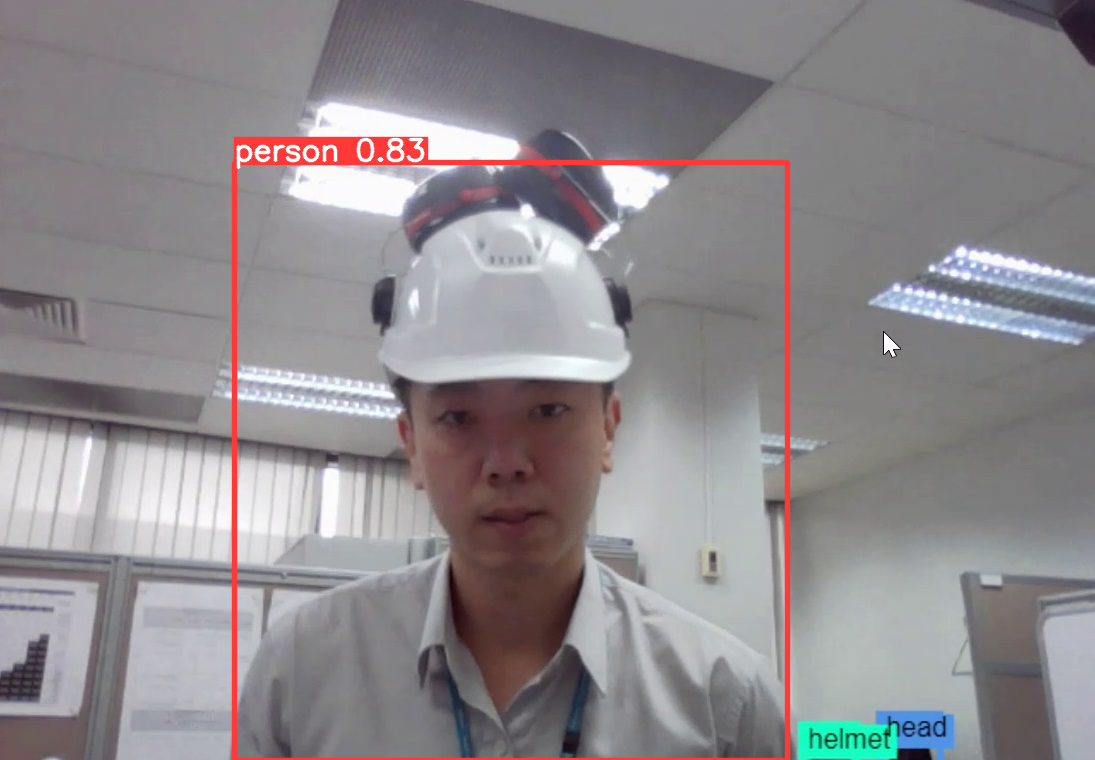

         xmin        ymin        xmax   ymax  confidence  class    name
0  234.176651  162.732224  787.136841  760.0    0.826076      0  person
Object 0 person


In [ ]:
results.show()
print(results.pandas().xyxy[0])

for i in range(len(results.pandas().xyxy[0].name)):
    print("Object",i,results.pandas().xyxy[0].name[i])

Ultralytics YOLOv8.0.43 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/drive/MyDrive/SDAAI/Capstone-Project/Safety-Hat/Images/Helmet-Example01.jpg: 448x640 1 Hardhat, 1115.9ms
Speed: 2.7ms preprocess, 1115.9ms inference, 8.3ms postprocess per image at shape (1, 3, 640, 640)


tensor([[370.00000, 199.00000, 641.00000, 392.00000,   0.70751,   0.00000]])


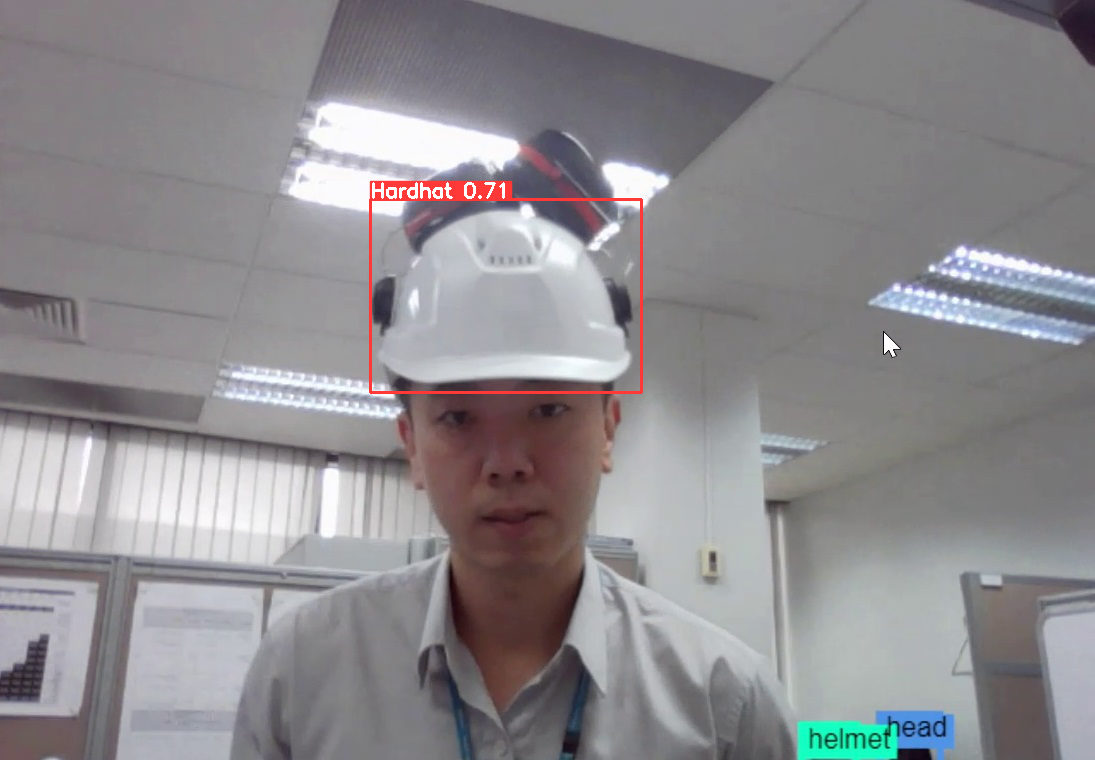

In [ ]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('keremberke/yolov8m-hard-hat-detection')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
#image = 'https://github.com/RP-SDAAI/Capstone-Project/blob/72573878f2546c1c2984c3e1006ef8e7c72672ec/Helmet-Example01.jpg'

#image = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'

# perform inference
results = model.predict(image_path)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image_path, result=results[0])
render.show()

## Camera Capture  
### Using a webcam to capture images for processing on the runtime.

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


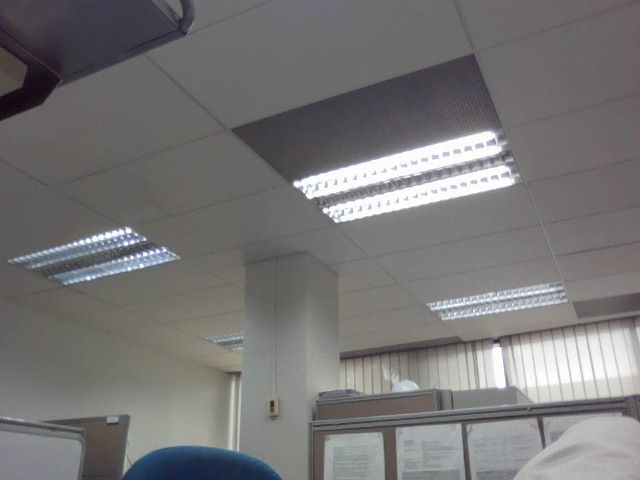

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

Ultralytics YOLOv8.0.43 🚀 Python-3.9.16 torch-1.13.1+cu116 CPU
Model summary (fused): 218 layers, 25840918 parameters, 0 gradients, 78.7 GFLOPs

image 1/1 /content/photo.jpg: 480x640 1 NO-Hardhat, 1246.9ms
Speed: 7.7ms preprocess, 1246.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


tensor([[1.08000e+02, 4.37000e+02, 3.08000e+02, 4.80000e+02, 2.98391e-01, 1.00000e+00]])


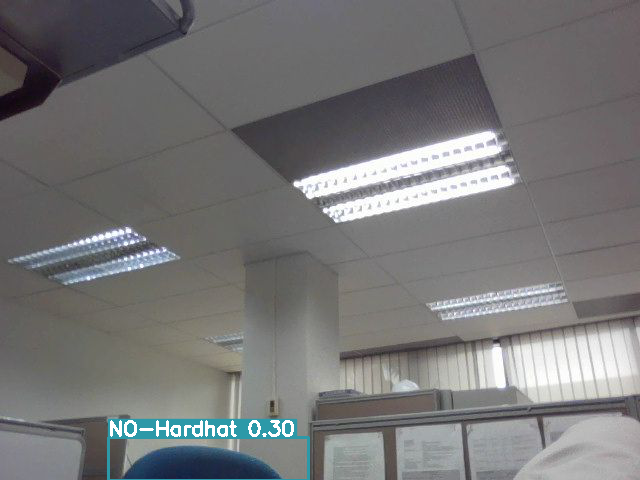

In [ ]:
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('keremberke/yolov8m-hard-hat-detection')

# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
#image = 'https://github.com/RP-SDAAI/Capstone-Project/blob/72573878f2546c1c2984c3e1006ef8e7c72672ec/Helmet-Example01.jpg'

#image = 'https://github.com/ultralytics/yolov5/raw/master/data/images/zidane.jpg'

# perform inference
#results = model.predict(image_path)
results = model.predict(filename)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=filename, result=results[0])
render.show()

#Need help to get working code for streaming video on google colab

In [ ]:


#vid = cv2.VideoCapture(0) # For streaming links (#0 : Computer Webcam. Otherwise need to know the RTSP Url of the Webcam, or the IP address that connect directly to the CCTV)
#while True:
#	rdy,frame = vid.read()
#	print(rdy)
#	try:
#	  cv2.imshow('Video Live IP cam',frame)
#	  key = cv2.waitKey(1) & 0xFF
#	  if key ==ord('q'):
#	    break
#	except:
#		pass

#vid.release()
#cv2.destroyAllWindows()

Streaming output truncated to the last 5000 lines.
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
F

KeyboardInterrupt: ignored

#Install Gradio for model deployment  
#### Reference: https://github.com/gradio-app/gradio

In [2]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 81.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 K

In [4]:
def test_preprocessing(self):
        inp = inputs.Webcam()
        array = inp.preprocess(BASE64_IMG)
        self.assertEqual(array.shape, (1, 224, 224, 3))

demo = gr.Interface(fn=test_preprocessing, inputs="image", outputs="image")

demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [3]:
import gradio as gr

def greet(name):
    return "Hello " + name + "!"

demo = gr.Interface(fn=greet, inputs="text", outputs="text")

#fn: the function to wrap a UI around
#inputs: which component(s) to use for the input (e.g. "text", "image" or "audio")
#outputs: which component(s) to use for the output (e.g. "text", "image" or "label")


demo.launch()




Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>